In [30]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv('datasets/codetest_train.txt', delimiter='\t')

In [ ]:
# STEP 1 - get the basic distribution of columns
df_train.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


Text(0, 0.5, 'population')

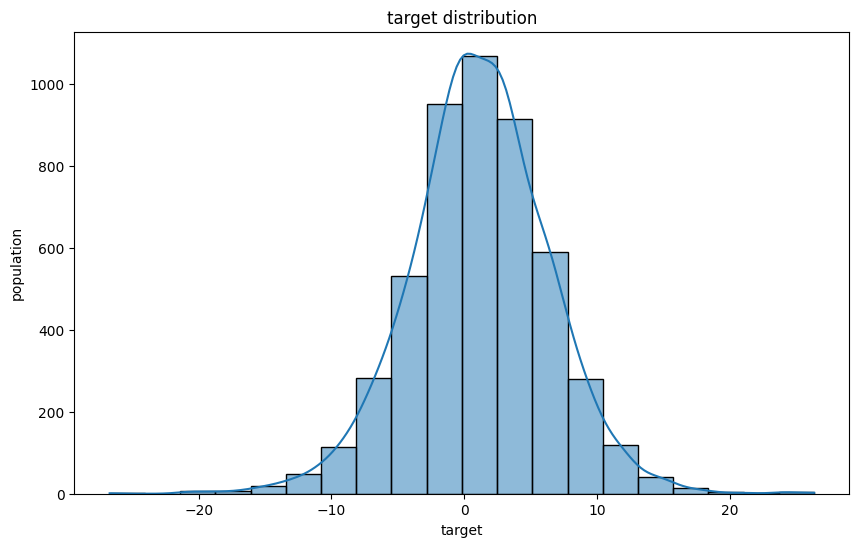

In [18]:
# STEP 2 - get the basic distribution of target
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train['target'], bins=20, kde=True)
plt.title('target distribution')
plt.xlabel('target')
plt.ylabel('population')

In [26]:
# STEP 3 - bifurcate into categorical and numerical
numeric_column = []
categorical_column = []

for col in df_train.columns.tolist():
    try:
        df_train[col] = df_train[col].astype('float')
        if (df_train[col]%1==0).all():
            df_train[col] = df_train[col].astype('int')
        
        numeric_column.append(col)

    except ValueError or TypeError:
        categorical_column.append(col)
        pass

In [28]:
categorical_column

['f_61', 'f_121', 'f_215', 'f_237']

In [29]:
for col in categorical_column:
    print(df_train[col].value_counts())

f_61
d    1015
b     982
c     979
e     975
a     954
Name: count, dtype: int64
f_121
B    837
E    830
A    829
C    815
F    803
D    800
Name: count, dtype: int64
f_215
red       1294
yellow    1224
orange    1198
blue      1182
Name: count, dtype: int64
f_237
Canada    1677
USA       1650
Mexico    1578
Name: count, dtype: int64


In [60]:
# STEP 4 - null value imputation
df_train[numeric_column] = df_train[numeric_column].fillna(df_train[numeric_column].median())
df_train[categorical_column] = df_train[categorical_column].fillna(df_train[categorical_column].mode().iloc[0])

In [62]:
# STEP 5 - Label Encoding (or any encoding technique)
from sklearn.preprocessing import LabelEncoder

df_le = df_train.copy()

le = LabelEncoder()
for col in categorical_column:
    df_le[col] = le.fit_transform(df_le[col])

In [63]:
for col in df_le.columns.tolist():
    if df_le[col].dtype not in ['float64', 'int64']:
        print(col)

In [64]:
df_le.shape

(5000, 255)

In [70]:
# STEP 6 - Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df_le.copy()
X = X.drop(columns = {'target'})
y = df_le['target']

model_lr = LinearRegression()

selector = RFE(model_lr, n_features_to_select=30)
X_transform = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(selected_features.tolist())

['f_25', 'f_29', 'f_35', 'f_36', 'f_54', 'f_61', 'f_63', 'f_67', 'f_70', 'f_74', 'f_81', 'f_92', 'f_94', 'f_99', 'f_116', 'f_138', 'f_146', 'f_161', 'f_168', 'f_169', 'f_175', 'f_181', 'f_193', 'f_195', 'f_196', 'f_198', 'f_205', 'f_217', 'f_218', 'f_237']


In [85]:
# STEP 7 - Model building 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_le.copy()
y = df_le[['target']]
X = X.drop(columns={'target'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_transformed = ss.fit_transform(X_train)
X_test_transformed = ss.fit_transform(X_test)



In [86]:
lr = LinearRegression() 
lr.fit(X_train_transformed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
y_train_pred = lr.predict(X_train_transformed)
y_test_pred = lr.predict(X_test_transformed)

In [88]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [89]:
print(mse_train, mse_test)

11.926815931390298 13.722732617202047


In [91]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

/opt/anaconda3/envs/projects/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [93]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [94]:
mse_rf_train = mean_squared_error(y_train, y_train_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_test_pred_rf)

In [95]:
print(mse_rf_train, mse_rf_test)

1.76278336300268 13.215981331031958


In [115]:
# Loading test

df_oot = pd.read_csv('datasets/codetest_test.txt', delimiter='\t')

In [116]:
df_oot

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,1.122,2.372,-1.303,-0.421,-1.724,0.206,0.449,1.305,-0.344,0.307,...,0.988,-0.472,0.522,-0.308,1.062,-0.839,0.819,0.342,-0.162,-1.123
1,0.645,-0.818,-1.193,0.286,0.946,2.001,-1.491,-0.162,-1.668,0.310,...,-0.020,0.764,-0.623,0.147,0.392,0.509,1.608,-0.321,-1.723,1.223
2,-0.661,0.373,1.160,0.448,NaN,-0.378,-0.645,0.713,1.900,0.627,...,0.156,-0.267,0.140,-0.908,0.093,0.227,-0.996,-0.665,0.444,-1.452
3,0.837,1.270,-1.421,-0.483,1.136,0.051,-0.097,NaN,-1.524,-0.253,...,1.653,1.951,0.657,-1.238,-0.487,-1.341,1.221,1.938,-0.447,0.411
4,-0.001,-0.050,0.442,0.230,0.525,0.326,-0.590,-0.287,-0.556,-0.088,...,-0.291,-0.196,-0.738,-0.377,-0.660,1.776,-1.028,-0.797,0.185,0.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.190,0.260,-0.303,0.784,0.718,-0.683,0.070,-0.300,-1.627,-1.605,...,1.670,-0.618,1.584,-0.749,-0.410,-0.349,-0.065,0.469,-1.032,0.271
996,-1.215,0.740,0.769,0.266,0.088,0.730,1.065,0.409,0.316,1.494,...,1.271,1.029,1.115,-0.081,-0.237,0.113,-0.348,-0.373,-1.021,NaN
997,-0.610,0.019,-1.733,1.414,-1.148,-0.702,0.451,0.274,0.186,0.910,...,1.396,-0.517,2.018,0.306,0.800,0.504,0.764,1.592,-0.451,1.215
998,0.025,0.100,-0.077,0.343,NaN,0.360,1.688,-0.882,0.834,-0.595,...,-0.089,0.564,2.365,0.529,NaN,0.194,NaN,-0.512,-2.358,-0.413


In [117]:
numeric_columns_oot = []
categorical_columns_oot = []

for col in df_oot.columns.tolist():
    try:
        df_oot[col] = df_oot[col].astype('float64')
        if (df_oot[col]%1==0).all():
            df_oot[col] = df_oot[col].astype('int64')
        
        numeric_columns_oot.append(col)
    except:
        categorical_columns_oot.append(col)
        pass

In [118]:
df_oot[numeric_columns_oot] = df_oot[numeric_columns_oot].fillna(df_oot[numeric_columns_oot].median())

In [119]:
df_oot[categorical_columns_oot] = df_oot[categorical_columns_oot].fillna(df_oot[categorical_columns_oot].mode().iloc[0])

In [120]:
df_le_oot = df_oot.copy()

for col in categorical_columns_oot:
    df_le_oot[col] = le.fit_transform(df_le_oot[col])

In [121]:
df_le_oot[categorical_columns_oot].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f_61    1000 non-null   int64
 1   f_121   1000 non-null   int64
 2   f_215   1000 non-null   int64
 3   f_237   1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [123]:
df_le_oot

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,1.122,2.372,-1.303,-0.421,-1.7240,0.206,0.449,1.3050,-0.344,0.307,...,0.988,-0.472,0.522,-0.308,1.062,-0.839,0.819,0.342,-0.162,-1.123
1,0.645,-0.818,-1.193,0.286,0.9460,2.001,-1.491,-0.1620,-1.668,0.310,...,-0.020,0.764,-0.623,0.147,0.392,0.509,1.608,-0.321,-1.723,1.223
2,-0.661,0.373,1.160,0.448,-0.0305,-0.378,-0.645,0.7130,1.900,0.627,...,0.156,-0.267,0.140,-0.908,0.093,0.227,-0.996,-0.665,0.444,-1.452
3,0.837,1.270,-1.421,-0.483,1.1360,0.051,-0.097,0.0175,-1.524,-0.253,...,1.653,1.951,0.657,-1.238,-0.487,-1.341,1.221,1.938,-0.447,0.411
4,-0.001,-0.050,0.442,0.230,0.5250,0.326,-0.590,-0.2870,-0.556,-0.088,...,-0.291,-0.196,-0.738,-0.377,-0.660,1.776,-1.028,-0.797,0.185,0.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.190,0.260,-0.303,0.784,0.7180,-0.683,0.070,-0.3000,-1.627,-1.605,...,1.670,-0.618,1.584,-0.749,-0.410,-0.349,-0.065,0.469,-1.032,0.271
996,-1.215,0.740,0.769,0.266,0.0880,0.730,1.065,0.4090,0.316,1.494,...,1.271,1.029,1.115,-0.081,-0.237,0.113,-0.348,-0.373,-1.021,-0.009
997,-0.610,0.019,-1.733,1.414,-1.1480,-0.702,0.451,0.2740,0.186,0.910,...,1.396,-0.517,2.018,0.306,0.800,0.504,0.764,1.592,-0.451,1.215
998,0.025,0.100,-0.077,0.343,-0.0305,0.360,1.688,-0.8820,0.834,-0.595,...,-0.089,0.564,2.365,0.529,-0.013,0.194,-0.051,-0.512,-2.358,-0.413


In [124]:
X_oot = df_le_oot[X.columns.tolist()]
X_oot_transform = ss.fit_transform(X_oot)

In [125]:
y_oot_pred_lr = lr.predict(X_oot_transform)
y_oot_pred_rf = rf.predict(X_oot)